In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import plotting


import auxil_ML as aux

In [127]:
plotting.setup_figure_pars()

0

In [128]:
derivation = 'Aakash'
if derivation == 'Aakash':
    cat_fn = '../ML_3FGL_paper_extra/data/python files/catas/3fgl_multi_cata_newfeats.csv'
else:
    #cat_fn = 'data/3FGL_prob_catalog_3class.csv'
    cat_fn = 'data/3FGL_prob_catalog_3class_newfeats.csv'
cat_df3 = pd.read_csv(cat_fn, index_col=0)

folder = '../ML_3FGL_paper/SOM'
cat_fn = '%s/3FGL_prob_catalog.csv' % folder
cat_df2 = pd.read_csv(cat_fn, index_col=0)

In [129]:
cat_df2.columns

Index(['GLON', 'GLAT', 'ln(Energy_Flux100)', 'ln(Unc_Energy_Flux100)',
       'ln(Signif_Curve)', 'ln(Variability_Index)', '500MeV_Index', 'HR12',
       'HR23', 'HR34', 'HR45', 'Category_3FGL', 'CLASS_3FGL', 'Pivot_Energy',
       'Spectrum_Type', 'ASSOC1', 'Flags', 'AGN_BDT', 'AGN_BDT_STD', 'PSR_BDT',
       'PSR_BDT_STD', 'AGN_NN', 'AGN_NN_STD', 'PSR_NN', 'PSR_NN_STD', 'AGN_RF',
       'AGN_RF_STD', 'PSR_RF', 'PSR_RF_STD', 'AGN_LR', 'AGN_LR_STD', 'PSR_LR',
       'PSR_LR_STD', 'AGN_BDT_O', 'AGN_BDT_STD_O', 'PSR_BDT_O',
       'PSR_BDT_STD_O', 'AGN_NN_O', 'AGN_NN_STD_O', 'PSR_NN_O', 'PSR_NN_STD_O',
       'AGN_RF_O', 'AGN_RF_STD_O', 'PSR_RF_O', 'PSR_RF_STD_O', 'AGN_LR_O',
       'AGN_LR_STD_O', 'PSR_LR_O', 'PSR_LR_STD_O', 'Category_Prob'],
      dtype='object')

In [147]:
cat = '3FGL'
cls = 'PSR'
nclass = 3
algs0 = ['RF', 'BDT', 'NN', 'LR']
algs_u = [alg + '_O' for alg in algs0]
algs.extend(algs_u)
print(algs)
#algs = ['RF', 'BDT', 'NN']
#algs = ['RF', 'BDT', 'LR']
alg0 = 'BDT'
alg0_ind = algs.index(alg0)
classes = ['AGN', 'PSR', 'OTHER'][:nclass]
add_errors = 0
save_plots = 1

if nclass == 2:
    cat_df = cat_df2
elif nclass == 3:
    cat_df = cat_df3
    if 'Category_Prob' not in cat_df.columns:
        print(classes)
        res = aux.get_prob_class(cat_df, algs, classes)
        cat_df = cat_df.merge(res, left_index=True, right_index=True)

nbins = 20
bins = np.linspace(0., 1., nbins + 1)
centers = (bins[1:] + bins[:-1]) / 2
assoc_sources = np.array((cat_df['Category_%s' % cat] == cls), dtype=float)

hsts = np.zeros((len(algs), len(centers)))
hsts_error = np.zeros((len(algs), len(centers)))
hsts_assoc = np.zeros((len(algs), len(centers)))

classif_sources = np.array((cat_df['Category_Prob'] == cls), dtype=float)
hsts_classif = np.zeros((len(algs), len(centers)))

['RF', 'BDT', 'NN', 'LR', 'RF_O', 'BDT_O', 'NN_O', 'LR_O', 'RF_O', 'BDT_O', 'NN_O', 'LR_O']
['AGN', 'PSR', 'OTHER']


In [148]:
cols = ['%s_%s' % (cls, alg) for alg in algs]
cat_df[cols]

,PSR_RF,PSR_BDT,PSR_NN,PSR_LR,PSR_RF_O,PSR_BDT_O,PSR_NN_O,PSR_LR_O,PSR_RF_O,PSR_BDT_O,PSR_NN_O,PSR_LR_O
Source_Name_3FGL,,,,,,,,,,,,
3FGL J0001.0+6314,0.089587,0.013305,0.057403,0.000831,0.128760,0.024098,0.050456,0.003578,0.128760,0.024098,0.050456,0.003578
3FGL J0001.2-0748,0.130290,0.024629,0.037958,0.043061,0.185676,0.051210,0.066832,0.070147,0.185676,0.051210,0.066832,0.070147
3FGL J0001.4+2120,0.023940,0.000200,0.001123,0.001074,0.036145,0.000364,0.003372,0.003920,0.036145,0.000364,0.003372,0.003920
3FGL J0002.2-4152,0.004183,0.000038,0.000941,0.000005,0.007263,0.000038,0.002198,0.000011,0.007263,0.000038,0.002198,0.000011
3FGL J0003.2-5246,0.005718,0.000074,0.001327,0.001821,0.009581,0.000114,0.003822,0.007259,0.009581,0.000114,0.003822,0.007259
...,...,...,...,...,...,...,...,...,...,...,...,...
3FGL J2221.7+6318,0.317211,0.734761,0.373530,0.715253,0.296058,0.533420,0.414303,0.633493,0.296058,0.533420,0.414303,0.633493
3FGL J2233.1+6542,0.327289,0.785497,0.619356,0.705033,0.450341,0.845248,0.664245,0.758355,0.450341,0.845248,0.664245,0.758355
3FGL J2237.9+6320,0.349161,0.537267,0.394743,0.516827,0.457507,0.531893,0.426246,0.499736,0.457507,0.531893,0.426246,0.499736


In [149]:
cat_df[cols][cat_df['Category_Prob'] == cls]

,PSR_RF,PSR_BDT,PSR_NN,PSR_LR,PSR_RF_O,PSR_BDT_O,PSR_NN_O,PSR_LR_O,PSR_RF_O,PSR_BDT_O,PSR_NN_O,PSR_LR_O
Source_Name_3FGL,,,,,,,,,,,,
3FGL J0007.0+7302,0.655321,0.930119,0.942763,0.966341,0.721958,0.943320,0.952408,0.959854,0.721958,0.943320,0.952408,0.959854
3FGL J0023.9-7203,0.923884,0.996563,0.919532,0.952481,0.929391,0.992689,0.920350,0.959269,0.929391,0.992689,0.920350,0.959269
3FGL J0030.4+0451,0.884868,0.992880,0.893515,0.976690,0.889056,0.996604,0.903795,0.974158,0.889056,0.996604,0.903795,0.974158
3FGL J0034.3-0534,0.744440,0.991604,0.767968,0.780775,0.808310,0.990228,0.765237,0.847977,0.808310,0.990228,0.765237,0.847977
3FGL J0101.0-6422,0.837278,0.990620,0.721248,0.648754,0.865328,0.986213,0.713043,0.794560,0.865328,0.986213,0.713043,0.794560
...,...,...,...,...,...,...,...,...,...,...,...,...
3FGL J2039.6-5618,0.700573,0.950046,0.816831,0.762683,0.823892,0.962743,0.794758,0.777493,0.823892,0.962743,0.794758,0.777493
3FGL J2048.8+4436,0.481715,0.682919,0.654523,0.819341,0.456646,0.480576,0.571528,0.813166,0.456646,0.480576,0.571528,0.813166
3FGL J2112.5-3044,0.826121,0.903235,0.822240,0.812917,0.839101,0.900246,0.802460,0.805607,0.839101,0.900246,0.802460,0.805607


In [153]:
#cat_df.columns
#list(cat_df['Category_Prob'])
nsrc = 0
lss = classes + ['MIXED']
print(lss)
for st in lss:
    nsrc += np.sum(cat_df['Category_Prob'] == st)
print(nsrc)
print(np.sum(cat_df['Category_Prob'] == cls))
print(np.sum(cat_df['Category_%s' % cat] == cls))

['AGN', 'PSR', 'OTHER'] ['AGN', 'PSR', 'OTHER', 'MIXED']
3021
162
166


In [155]:
unas_mask = (cat_df['Category_%s' % cat] == 'UNAS')
if nclass == 2 and False:
    unas_mask |= (cat_df['Category_%s' % cat] == 'OTHER')
unas_mask = np.array(unas_mask, dtype=float)
assoc_mask = 1. - unas_mask

In [156]:
for i, alg in enumerate(algs):
    label = '%s_%s' % (cls, alg)
    hsts[i] = np.histogram(cat_df[label], bins=bins, weights=cat_df[label] * assoc_mask)[0]
    if add_errors:
        hsts_error[i] = np.histogram(cat_df[label], bins=bins, weights=cat_df[label + '_STD']**2 * assoc_mask)[0]
        hsts_error[i] = np.sqrt(hsts_error[i])
    hsts_assoc[i] = np.histogram(cat_df[label], bins=bins, weights=assoc_sources)[0]
    hsts_classif[i] = np.histogram(cat_df[label], bins=bins, weights=classif_sources)[0]

plots/3class/3FGL_3classes_RF_PSR_Aakash.pdf
plots/3class/3FGL_3classes_BDT_PSR_Aakash.pdf
plots/3class/3FGL_3classes_NN_PSR_Aakash.pdf
plots/3class/3FGL_3classes_LR_PSR_Aakash.pdf
plots/3class/3FGL_3classes_RF_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_BDT_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_NN_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_LR_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_RF_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_BDT_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_NN_O_PSR_Aakash.pdf
plots/3class/3FGL_3classes_LR_O_PSR_Aakash.pdf


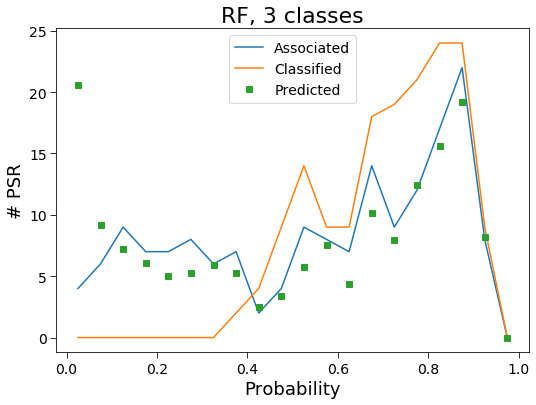

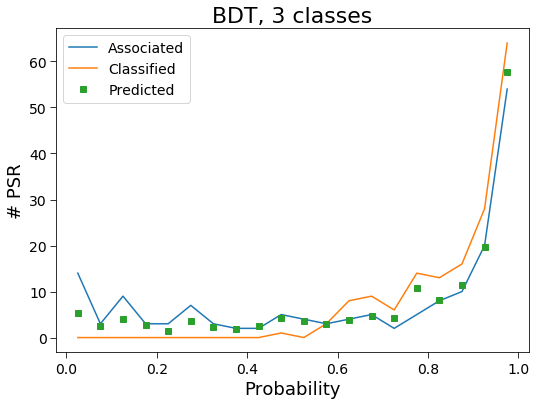

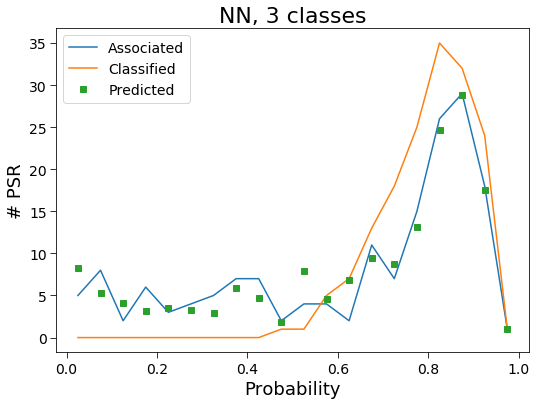

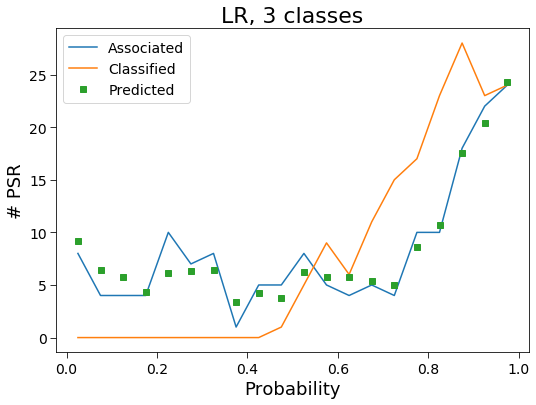

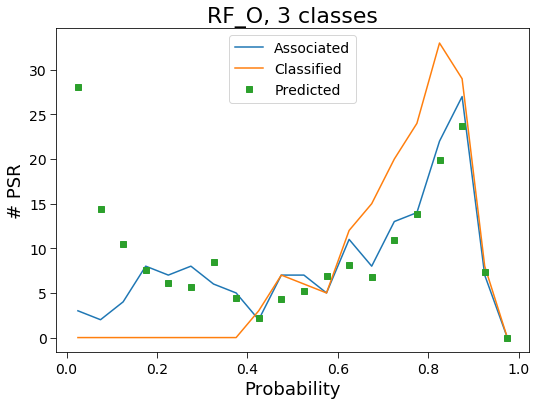

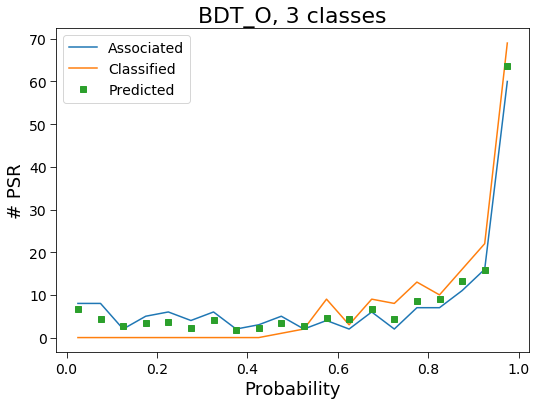

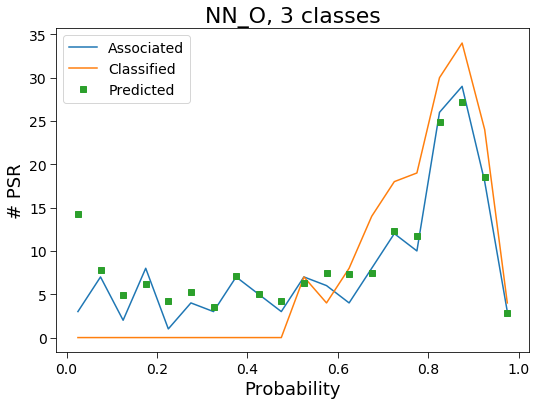

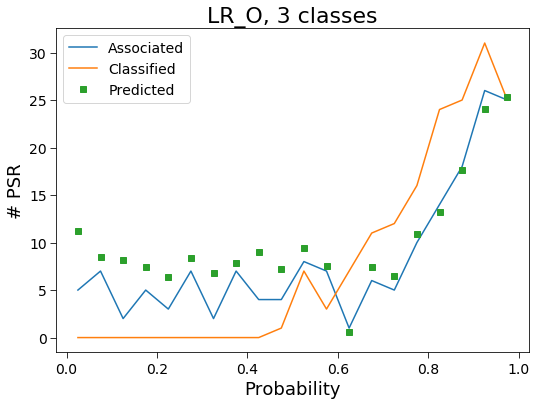

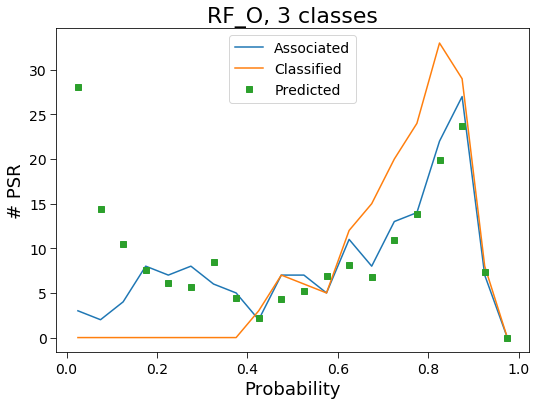

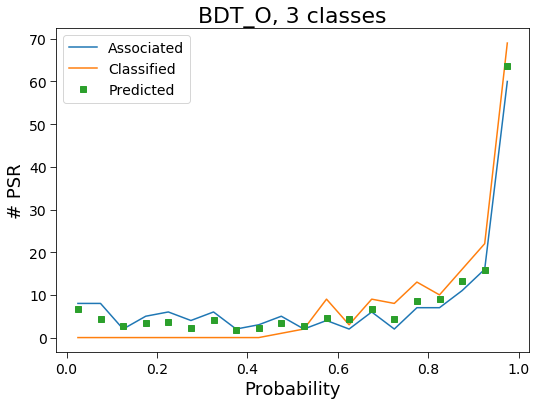

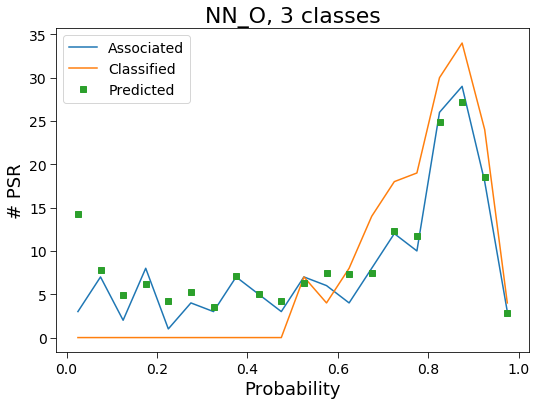

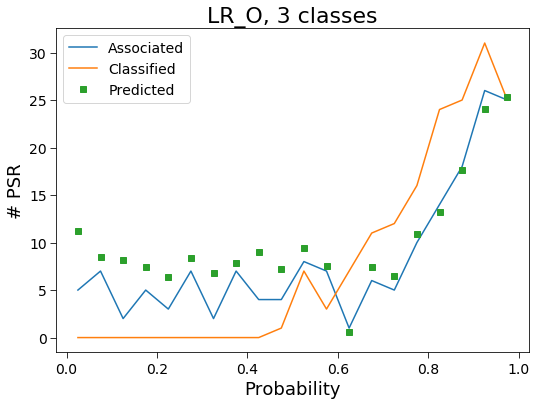

In [157]:
for i, alg in enumerate(algs):
    pyplot.figure()
    pyplot.plot(centers, hsts_assoc[i], label='Associated')
    if nclass == 2 or True:
        pyplot.plot(centers, hsts_classif[i], label='Classified')
    if add_errors:
        pyplot.errorbar(centers, hsts[i], hsts_error[i], ls='', marker='s', label='Predicted')
    else:
        pyplot.plot(centers, hsts[i], ls='', marker='s', label='Predicted')
    pyplot.xlabel('Probability')
    if cls == 'OTHER':
        pyplot.ylabel('# OTHER sources')
    else:
        pyplot.ylabel('# %s' % cls)
    data = np.sum(hsts_assoc[i])
    model = np.sum(hsts[i])
    error = np.sqrt(np.sum(hsts_error[i]))
    if add_errors:
        print('%s (data - model) / error = %.2f' % (alg, (data - model) / error))
    pyplot.title('%s, %i classes' % (algs[i], nclass))
    pyplot.legend()
    if save_plots:
        fn = 'plots/3class/%s_%iclasses_%s_%s.pdf' % (cat, nclass, alg, cls)
        if nclass == 3:
            fn = fn.replace('.pdf', '_%s.pdf' % derivation)
        print(fn)
        pyplot.savefig(fn)

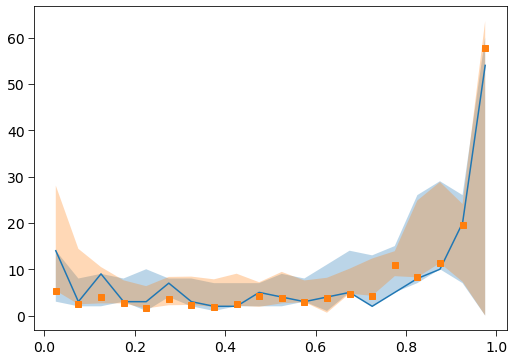

In [158]:
pyplot.figure()
pyplot.plot(centers, hsts_assoc[alg0_ind])
pyplot.fill_between(centers, np.min(hsts_assoc, axis=0), np.max(hsts_assoc, axis=0), alpha=0.3)
pyplot.errorbar(centers, hsts[alg0_ind], hsts_error[alg0_ind], ls='', marker='s')
pyplot.fill_between(centers, np.min(hsts, axis=0), np.max(hsts, axis=0), alpha=0.3)
